# Wheat Seed Kernels

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster import hierarchy
from sklearn.decomposition import PCA

sns.set_style("whitegrid")

In [2]:
data = pd.read_csv("./data/seeds.csv")
numeric_data = data.iloc[:, :-1]
variety = data.variety

In [3]:
kmeans = KMeans(n_clusters=3, n_init='auto')
labels_kmeans = kmeans.fit_predict(numeric_data)

model = GaussianMixture(n_components=3)
labels_gaussian = model.fit_predict(numeric_data)

Z = hierarchy.linkage(numeric_data)
labels_linkage = hierarchy.fcluster(Z, criterion='maxclust', t=3)

c:\Users\luisa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\luisa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


This function creates side-by-side grouped scatter plots of the transformed data.

In [4]:
def plotClusters(data, labels_kmeans, labels_gaussian, labels_linkage):
    pca = PCA(n_components=data.shape[1])
    Y = pca.fit_transform(data)
    
    fig, axs = plt.subplots(2, 2)
    
    sns.scatterplot(ax=axs[0, 0], x=Y[:, 0], y=Y[:, 1], hue=labels_kmeans, palette="deep")
    axs[0, 0].set_title("k-Means")
    
    sns.scatterplot(ax=axs[0, 1], x=Y[:, 0], y=Y[:, 1], hue=labels_gaussian, palette="deep")
    axs[0, 1].set_title("Gaussian Mixture")
    
    sns.scatterplot(ax=axs[1, 0], x=Y[:, 0], y=Y[:, 1], hue=labels_linkage, palette="deep")
    axs[1, 0].set_title("Hierarchical Tree")

    axs[1, 1].axis("off")

    plt.tight_layout()
    plt.show()

This function creates side-by-side heatmaps of the cross-tabluation values.

In [5]:
def plotCrosstabs(categories, labels_kmeans, labels_gaussian, labels_linkage):
    fig, axs = plt.subplots(2, 2)

    sns.heatmap(ax=axs[0, 0], data=pd.crosstab(categories, labels_kmeans), annot=True, fmt="")
    axs[0, 0].set_title("k-Means")
    axs[0, 0].set_xlabel("Labels")
    
    sns.heatmap(ax=axs[0, 1], data=pd.crosstab(categories, labels_gaussian), annot=True, fmt="")
    axs[0, 1].set_title("Gaussian Mixture")
    axs[0, 1].set_xlabel("Labels")
    
    sns.heatmap(ax=axs[1, 0], data=pd.crosstab(categories, labels_linkage), annot=True, fmt="")
    axs[1, 0].set_title("Hierarchical Tree")
    axs[1, 0].set_xlabel("Labels")

    axs[1, 1].axis("off")

    plt.tight_layout()
    plt.show()

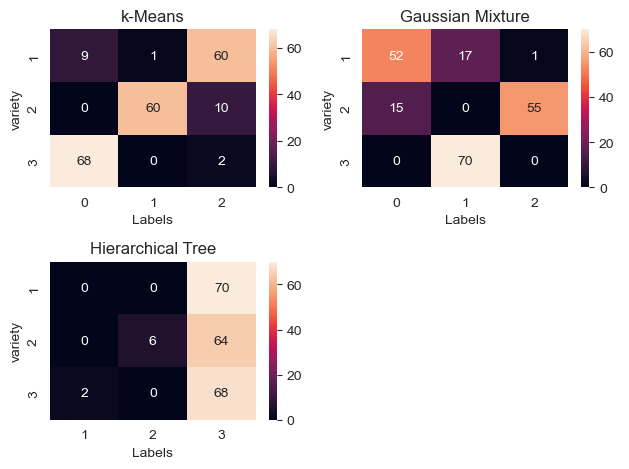

In [6]:
plotCrosstabs(variety, labels_kmeans, labels_gaussian, labels_linkage)